Percy Skincare has provided you with access to their revenue dataset. The company has informed you that the start date for keeping track of advertisement expenses and profit generated is January 11th, 2005 and the end date is September 23rd, 2021. Your task is to create a column in the dataset that holds the date with a frequency of months. Then, plot the data to identify trends in expenses and profits over time. Additionally, create two new columns that hold the month name and day name for each transaction. Then group the data by month to create a new DataFrame to obtain the average expense and the standard deviation of profit. Next, group the data by day to create a new DataFrame that contains expenses and profits that are greater than the average expense and profit. Finally, group the data by year and plot separately for each year the trend of the data.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading data from csv file
df= pd.read_csv('./data/advert (1).csv')

In [3]:
#genrating date column and changing to datetime
df['date']=pd.date_range(start='1/11/2005', end='9/23/2021', freq='M')
df["date"] = pd.to_datetime(df["date"])

In [4]:
df

,expense,profit,date
0,337.1,22.1,2005-01-31
1,128.9,10.4,2005-02-28
2,132.4,9.3,2005-03-31
3,251.3,18.5,2005-04-30
4,250.0,12.9,2005-05-31
...,...,...,...
195,55.7,7.6,2021-04-30
196,107.2,9.7,2021-05-31
197,192.7,12.8,2021-06-30
198,391.8,25.5,2021-07-31


plot the data to identify trends in expenses and profits over time

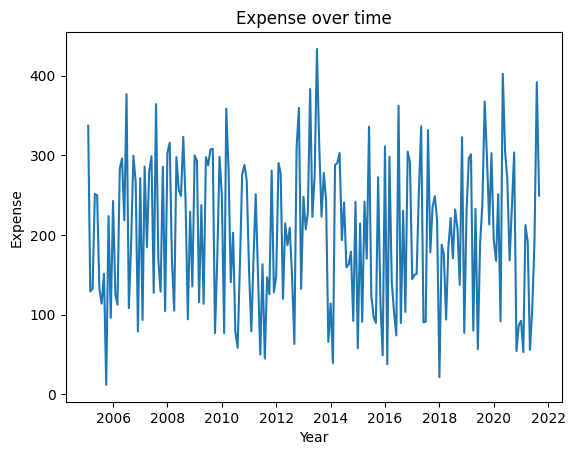

In [5]:
#plotting expense over time
plt.plot(df['date'],df['expense'])
plt.ylabel('Expense')
plt.xlabel('Year')
plt.title('Expense over time')
plt.show()

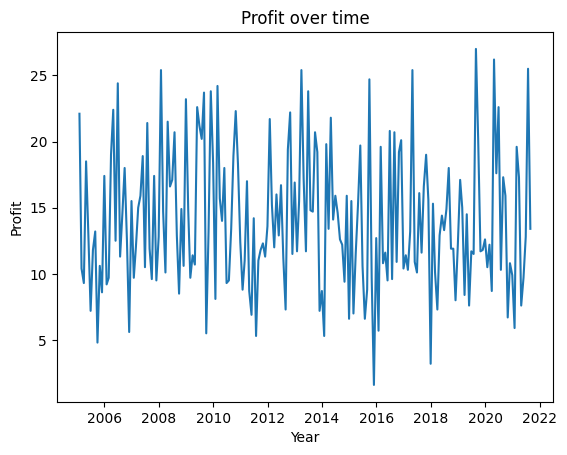

In [6]:
#plotting profit over time
plt.plot(df['date'],df['profit'])
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Profit over time')
plt.show()

create two new columns that hold the month name and day name for each transaction.

In [7]:
#month coumn
df['Month']= df['date'].dt.month_name()

In [8]:
#day column
df['Day']= df['date'].dt.day_name()
df 

,expense,profit,date,Month,Day
0,337.1,22.1,2005-01-31,January,Monday
1,128.9,10.4,2005-02-28,February,Monday
2,132.4,9.3,2005-03-31,March,Thursday
3,251.3,18.5,2005-04-30,April,Saturday
4,250.0,12.9,2005-05-31,May,Tuesday
...,...,...,...,...,...
195,55.7,7.6,2021-04-30,April,Friday
196,107.2,9.7,2021-05-31,May,Monday
197,192.7,12.8,2021-06-30,June,Wednesday
198,391.8,25.5,2021-07-31,July,Saturday


group the data by month to create a new DataFrame to obtain the average expense and the standard deviation of profit

In [9]:
#dataframe for month data
groupby_month=df.groupby('Month').agg(mean_expense=('expense', np.mean),std_profit=('profit', np.std))
groupby_month

,mean_expense,std_profit
Month,,
April,220.894118,5.527718
August,198.882353,5.121372
December,192.787500,4.812410
February,212.429412,4.673226
January,174.288235,6.040793
July,205.217647,5.511926
June,217.594118,5.459571
March,197.952941,4.603635
May,201.264706,4.443377


group the data by day to create a new DataFrame that contains expenses and profits that are greater than the average expense and profit

In [10]:
#group by day
day_group=df.groupby(['Day']).mean(numeric_only=True)
day_group

,expense,profit
Day,,
Friday,157.207407,12.051852
Monday,218.710000,14.640000
Saturday,188.196667,13.493333
Sunday,206.718519,14.855556
Thursday,222.689655,15.027586
Tuesday,194.028571,13.410714
Wednesday,215.451724,14.575862


In [11]:
#expenses and profits that are greater than the average expense and profit
condition=day_group[['expense','profit']]>df[['expense','profit']].mean()
day_group[condition].dropna()


,expense,profit
Day,,
Monday,218.710000,14.640000
Sunday,206.718519,14.855556
Thursday,222.689655,15.027586
Wednesday,215.451724,14.575862


group the data by year and plot separately for each year the trend of the data.

In [12]:
#adding year column
df['year']= df['date'].dt.year
df

,expense,profit,date,Month,Day,year
0,337.1,22.1,2005-01-31,January,Monday,2005
1,128.9,10.4,2005-02-28,February,Monday,2005
2,132.4,9.3,2005-03-31,March,Thursday,2005
3,251.3,18.5,2005-04-30,April,Saturday,2005
4,250.0,12.9,2005-05-31,May,Tuesday,2005
...,...,...,...,...,...,...
195,55.7,7.6,2021-04-30,April,Friday,2021
196,107.2,9.7,2021-05-31,May,Monday,2021
197,192.7,12.8,2021-06-30,June,Wednesday,2021
198,391.8,25.5,2021-07-31,July,Saturday,2021


In [13]:
#creating year dataframe
year_group=df.groupby('year').mean(numeric_only=True)
year_group

,expense,profit
year,,
2005,172.633333,12.233333
2006,218.766667,14.558333
2007,218.791667,13.716667
2008,226.400000,16.350000
2009,229.725000,16.266667
2010,195.891667,15.341667
2011,144.491667,10.991667
2012,213.308333,15.250000
2013,248.866667,15.883333


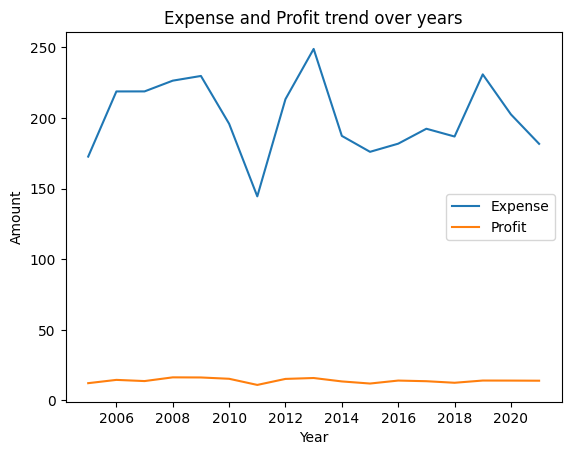

In [14]:
plt.plot(year_group['expense'],label="Expense")
plt.plot(year_group['profit'],label="Profit")
plt.ylabel('Amount')
plt.xlabel('Year')
plt.title('Expense and Profit trend over years')
plt.legend()
plt.show()